In [1]:
# fmt: off
from Utilities.Utils import plot_images
from Utilities.Interpretability.InterpretabilityMethods import * 
from Utilities.Tasks.MNISTClassificationTask import MNISTClassificationTask as Task
from Utilities.AdversarialTraining import AdversarialExampleTrainer

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
# fmt: on
print(tf.config.list_physical_devices('GPU'))

[]


In [2]:
MODEL_SAVE_PATH = "models/MNIST_INTERLEAVED_ADVERSARIAL_MODEL/"
model:tf.keras.models.Model = tf.keras.models.load_model(MODEL_SAVE_PATH, compile=False) # type: ignore
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

task = Task(
    "Task1",
    model,
    loss_fn,
    task_labels=[0,1,2,3,4,5,6,7,8,9],
    training_batches=250,
    validation_batches=100,
    batch_size=32,
    # data_path="../../datasets/IntelNaturalScenes"
)
task.compile_model(loss_fn)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_0 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2320  

In [3]:
EPSILON = 0.1
adversarial_example_trainer = AdversarialExampleTrainer(task)

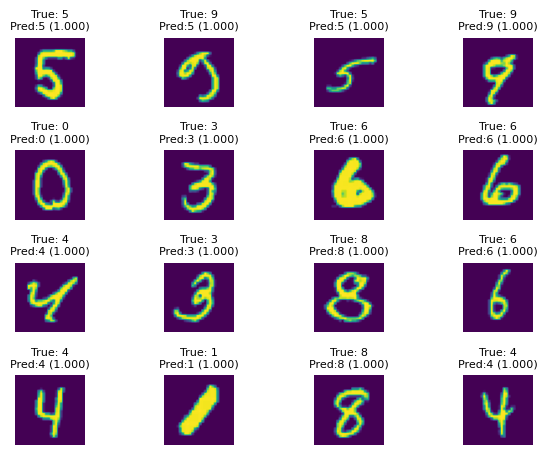

In [4]:
adversarial_example_trainer.display_adversarial_images(epsilon=0.0, num_images=16, titles=True, use_validation_dataset=True)

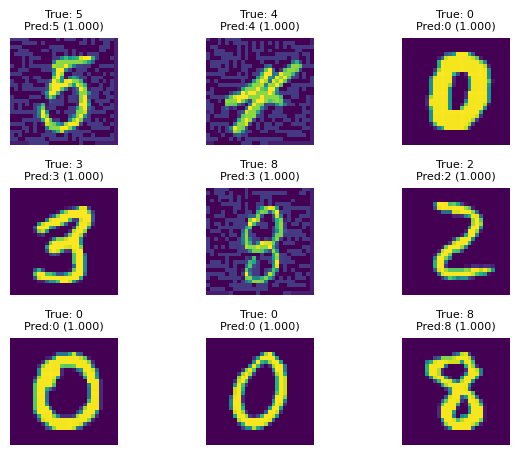

In [5]:
adversarial_example_trainer.display_adversarial_images(EPSILON, 9, True, use_validation_dataset=True)

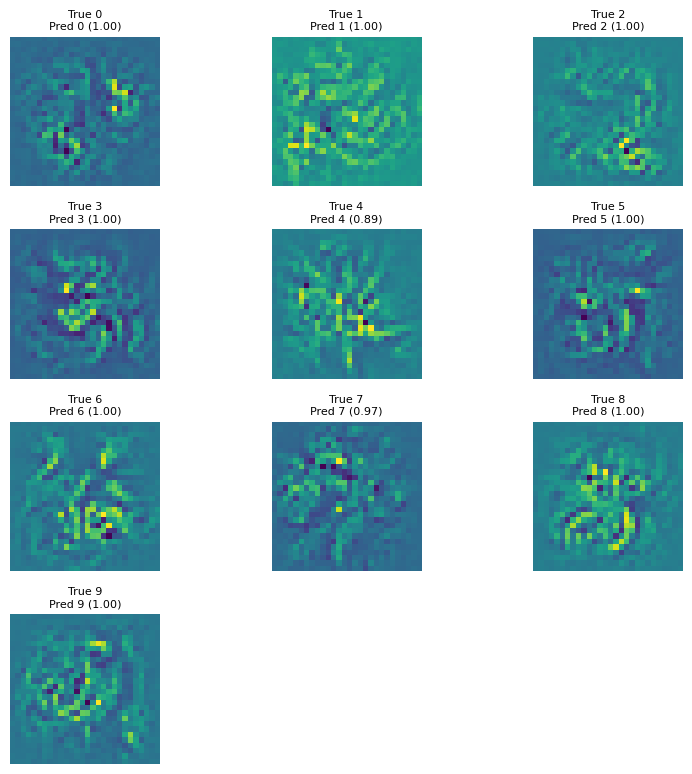

In [26]:
maximal_class_activations(model, steps=10000, step_size=0.001 ,titles=True, figsize=(8,8))

In [25]:
task.train_on_task(epochs=1)

250/250 [==============================] - 6s 21ms/step - loss: 0.0000e+00 - base_loss: 0.0000e+00 - val_loss: 0.1827 - val_base_loss: 0.1827


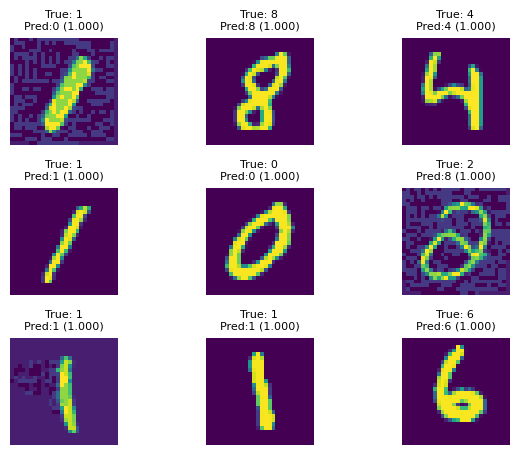

In [7]:
adversarial_example_trainer.display_adversarial_images(EPSILON, 9, True, use_validation_dataset=True)

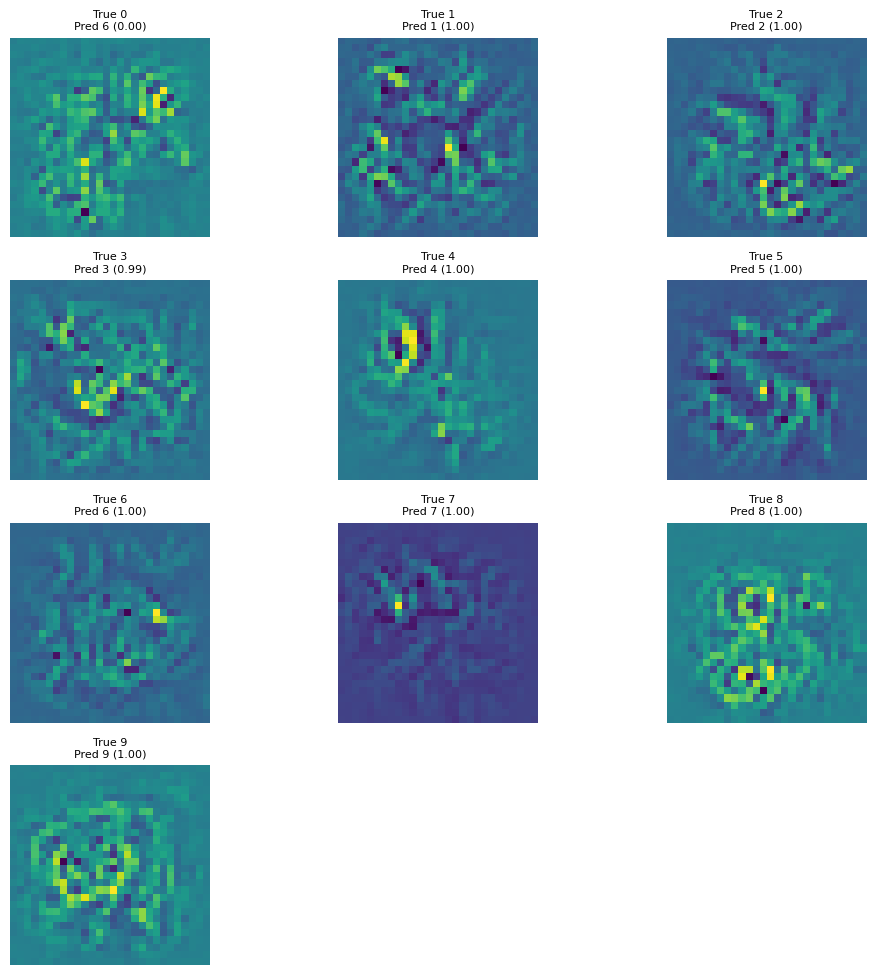

In [8]:
maximal_class_activations(model, titles=True, figsize=(10,10))